In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
PRML Assignment 1 - Part B

Submitted on 02 Sep 2022

@authors: 
Viriya Duch Sam
Caity Ngov

"""

'\nPRML Assignment 1 - Part B\n\nSubmitted on 02 Sep 2022\n\n@authors: \nViriya Duch Sam\nCaity Ngov\n\n'

# Introduction
This report aims to apply logistic regression from FashionMNIST dataset in order to build a machine learning model which can predict different categories of clothing using pixel attributes of an image.

Essentially, this is a multiclass classification problem.

This dataset consists of 60,000 examples, each examples is a 28x28 grayscale image with 10 classes and it contains 785 columns.

The dataset was obtained from Zalando Research via Kaggle: https://www.kaggle.com/datasets/zalando-research/fashionmnist.

Each training and test example is assigned to one of the following labels:

    • 0 T-shirt/top 
    • 1 Trouser 
    • 2 Pullover 
    • 3 Dress 
    • 4 Coat 
    • 5 Sandal 
    • 6 Shirt 
    • 7 Sneaker 
    • 8 Bag 
    • 9 Ankle boot

# Load packages

In [2]:
# Standard imports
import os

# Dependencies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Retrieving Data
We will load the FashionMNIST dataset that we have retrieved from kaggle.

In [3]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [4]:
# Preview train dataset
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploring Data
Here, we attempt to describe any special adaptation and characteristics of our data.

### View dataset information

In [5]:
# Train Data Information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
# Train data columns
train.keys()

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [7]:
# Preview the labels of the first 10 entries. 
train.label[:10]

0    2
1    9
2    6
3    0
4    3
5    4
6    4
7    5
8    4
9    8
Name: label, dtype: int64

### Labels Distribution in Train Dataset
Here, we want to explore the distribution of of each label within our training dataset. It is important for our training data to have even class distribution, so that our output model will achieve the best possible performance.

In [8]:
from collections import Counter

print('Number of entries per class:', Counter(train.label))

Number of entries per class: Counter({2: 6000, 9: 6000, 6: 6000, 0: 6000, 3: 6000, 4: 6000, 5: 6000, 8: 6000, 7: 6000, 1: 6000})


We see here that each label contains exactly the same amount of data (6000 entries each for 10 different classes.) We can also visualise the class distribution using seaborn function:

<AxesSubplot:xlabel='label', ylabel='count'>

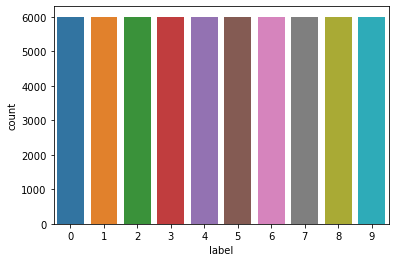

In [9]:
sns.countplot(x = train['label'])

## Data Preparation
We will prepare our train dataset for model building. First, let's check the shape of our current train set.

In [10]:
train.shape

(60000, 785)

Our data columns consist of label (1 column) and 784 pixel values. We want to drop our label columns for training our model. Our pixel data columns are also one-dimensional at the moment, so we first have to reshape them into three-dimensional value in order to later generate images.

In [11]:
xTrain = train.drop(['label'], axis=1).astype('float32')
yTrain = train['label'].astype('int32')

### Show random image and data from training set
We will generate a series of 5 random images from our dataset. We will create a for-lopp which generates a random index within the entries of the data set and displays corresponding image and data 

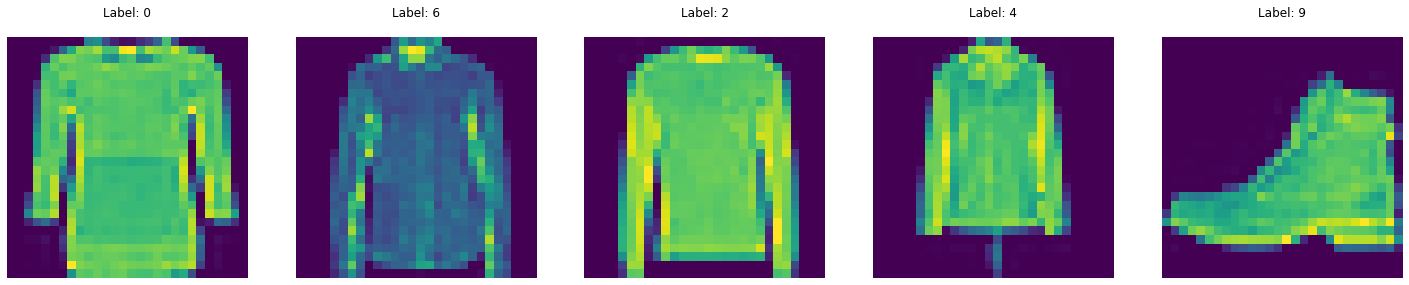

In [12]:
plt.figure(figsize=(25,5))
for idx in range(5):
 index = np.random.randint(1, xTrain.shape[0]+1)  
 label = yTrain[index]
 plt.subplot(1, 5, idx + 1)
 plt.axis("off")
 plt.imshow(xTrain.values[index].reshape(28, 28))
 plt.title('Label: %i\n' % label)

## Corresponding matrix

In [13]:
# Full xTrain table
xTrain

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,160.0,162.0,163.0,135.0,94.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# xTrain table at a random index
print(index)
xTrain[index:index+1]

57316


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
57316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Corresponding matrix to xTrain index
np.matrix(xTrain.values[index]).reshape(28, 28)

matrix([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,  20.,  94.,
           1.,   0.,   1.,   0.,   5.,   4.,   1.,   0.],
        [  0.,   0.,

## Understand the data
Our train dataset consists of 60,000 images in the form of 28x28 pixels black & white (grayscale). Each pixel value ranges from 0 (black) to 255 (white). Since we have 785 columns in our data, where one column represents the label of the image, we conclude that there are 784 pixels (or 28x28) per image to be processed. There are 10 classes of label ranging from 0-9.

In [16]:
# Minimum pixel value
np.min(xTrain.values[index])

0.0

In [17]:
# Maximum pixel value
np.max(xTrain.values[index])

255.0

In [18]:
# Rows and Columns of train data without the labels
xTrain.shape

(60000, 784)

#### Count of labels in dataset 

In [19]:
labels = yTrain.unique()
labels.sort()
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Build a Logistic Regression model
Logistic Regression is a simple and popular machine learning technique for predicting the probability of a target variable. Logistic Regression is used to predict the likelihood of a categorical dependent variable.

In multiclass classification problem, we can train a single independent logistic regression unit for each class as positive and other units (for the rest of the classes) as negative--this is referred as One-vs-All logistic regression method.

### Split Train and Validation data
We will split off a chunk of our train dataset for our validation dataset. 

In [20]:
X_train, X_validation, y_train, y_validation = train_test_split(xTrain, yTrain, test_size=0.33, random_state=100)

### Select a Linear Regression Classifier

In [21]:
clf = LogisticRegression(solver = 'lbfgs', max_iter = 100)

### Train the model 

In [22]:
clf.fit(X_train, y_train)

C:\Users\Viriya Duch Sam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predict some data from validation set

In [23]:
y_pred = clf.predict(X_validation)
y_pred == y_validation

34046    False
2951      True
5692      True
4582      True
4401      True
         ...  
50354     True
8221      True
46364     True
19601    False
59515     True
Name: label, Length: 19800, dtype: bool

In [24]:
# Score on validation set
clf.score(X_validation, y_validation)

0.85

### Split test dataset

In [25]:
X_test = test.drop(columns=["label"])
y_test = test["label"]

In [26]:
# Predict some test set data
y_pred = clf.predict(X_test)
y_pred == y_test

0        True
1        True
2        True
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999    False
Name: label, Length: 10000, dtype: bool

In [27]:
# Score on test set
clf.score(X_test, y_test)

0.8507

# Evaluation

### Classification Report

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.95      0.98      0.96      1000
           2       0.77      0.75      0.76      1000
           3       0.87      0.87      0.87      1000
           4       0.75      0.81      0.78      1000
           5       0.94      0.89      0.91      1000
           6       0.66      0.60      0.63      1000
           7       0.90      0.93      0.91      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### Confusion Matrix

In [29]:
print(confusion_matrix(y_test, y_pred))

[[804   9  14  39   7   0 105   0  21   1]
 [  2 976   3  13   0   2   4   0   0   0]
 [ 20   3 752  13 120   0  80   0  12   0]
 [ 31  26  17 867  34   0  22   0   3   0]
 [  0   0  80  29 805   1  82   0   3   0]
 [  2   1   0   0   0 887   1  65   8  36]
 [141   8 106  31 102   0 597   0  15   0]
 [  0   0   0   0   0  28   0 927   1  44]
 [  6   1   7   2   6  13  13   4 946   2]
 [  0   0   0   0   0  15   0  36   3 946]]


### Visualise Misclassified Images

In [30]:
predictedCorrect = y_pred == y_test
predictedWrong = ~predictedCorrect

In [31]:
# We append 2 new columns to a copy of our test data set
testPred_df = test.copy()
testPred_df["Correct Prediction"] = predictedCorrect
testPred_df["Prediction"] = y_pred
testPred_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Correct Prediction,Prediction
0,0,0,0,0,0,0,0,0,9,8,...,56,0,0,0,0,0,0,0,True,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,1
2,2,0,0,0,0,0,0,14,53,99,...,0,0,63,53,31,0,0,0,True,2
3,2,0,0,0,0,0,0,0,0,0,...,140,0,133,224,222,56,0,0,False,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,4


#### Define lists of indexes

In [32]:
i = 0
incorrectPredIndexes = []
correctPredIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        incorrectPredIndexes.append(i)
    else:
        correctPredIndexes.append(i)
    i += 1

In [34]:
# First 5 indexes of misclassified predictions
incorrectPredIndexes[:5]

[3, 4, 5, 12, 16]

In [35]:
# For example, at index = 3, the predicted was 0
print(y_pred[3])

# while the true label was 2
print(y_test[3])

0
2


#### Plot misclassified images

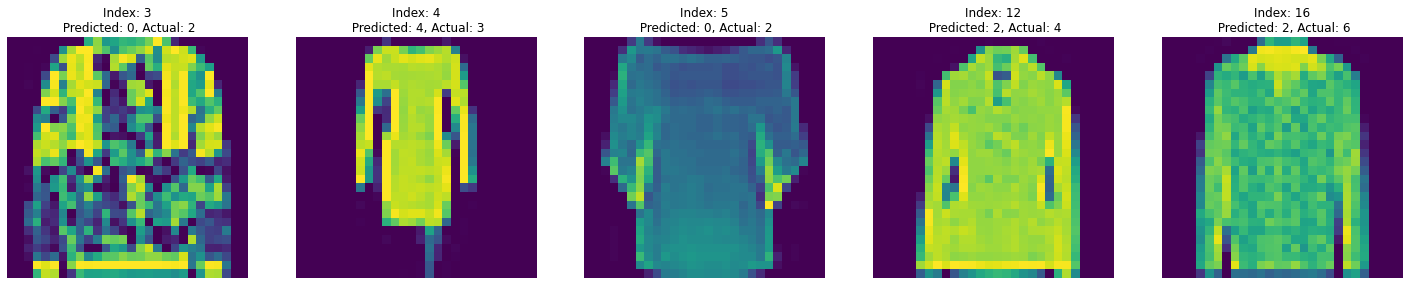

In [36]:
plt.figure(figsize=(25,5))
for plotIndex, misclassifiedIndex in enumerate(incorrectPredIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.axis("off")
    plt.imshow(np.array(X_test.iloc[misclassifiedIndex, :]).reshape(28, 28), interpolation='nearest')
    plt.title('Index: {}\n Predicted: {}, Actual: {}'.format(misclassifiedIndex, y_pred[misclassifiedIndex], np.array(y_test)[misclassifiedIndex]))

### Visualise Corrected Images

In [37]:
correctPredIndexes[:5]

[0, 1, 2, 6, 7]

In [38]:
# We can check for index = 7, the predicted label is 6
print(y_pred[7])

# the true label is also 6
print(y_test[7])

6
6


#### Plot Correction Predictions

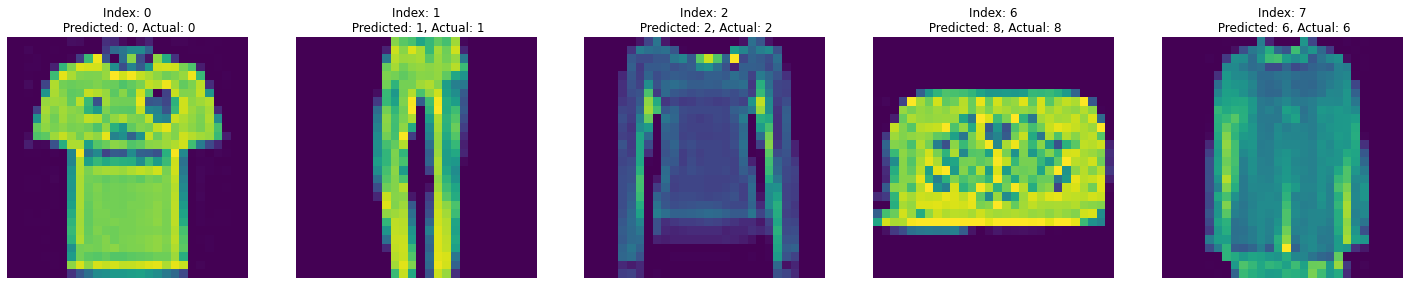

In [39]:
plt.figure(figsize=(25,5))
for plotIndex, correctIndexes in enumerate(correctPredIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.axis("off")
    plt.imshow(np.array(X_test.iloc[correctIndexes, :]).reshape(28, 28), interpolation='nearest')
    plt.title('Index: {}\n Predicted: {}, Actual: {}'.format(correctIndexes, y_pred[correctIndexes], np.array(y_test)[correctIndexes]))
plt.show()